In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'C:/Users/DCL/Desktop/final/Dataset/train'
valid_path = 'C:/Users/DCL/Desktop/final/Dataset/val'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob('C:/Users/DCL/Desktop/test1/Tomato_Dataset/train/*')

In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:

training_set = train_datagen.flow_from_directory('C:/Users/DCL/Desktop/final/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1086 images belonging to 10 classes.


In [15]:

test_set = test_datagen.flow_from_directory('C:/Users/DCL/Desktop/final/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 273 images belonging to 10 classes.


In [16]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DCL\AppData\Local\Temp\ipykernel_6672\3565302307.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
34/34 [==============================] - 256s 8s/step - loss: 1.3277 - accuracy: 0.7311 - val_loss: 0.7235 - val_accuracy: 0.8205
Epoch 2/5
34/34 [==============================] - 278s 8s/step - loss: 0.5379 - accuracy: 0.8407 - val_loss: 0.5829 - val_accuracy: 0.8535
Epoch 3/5
34/34 [==============================] - 293s 9s/step - loss: 0.3384 - accuracy: 0.9024 - val_loss: 0.4808 - val_accuracy: 0.8608
Epoch 4/5
34/34 [==============================] - 268s 8s/step - loss: 0.2816 - accuracy: 0.9125 - val_loss: 0.5535 - val_accuracy: 0.8388
Epoch 5/5
34/34 [==============================] - 724s 22s/step - loss: 0.2111 - accuracy: 0.9401 - val_loss: 0.5758 - val_accuracy: 0.8498


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


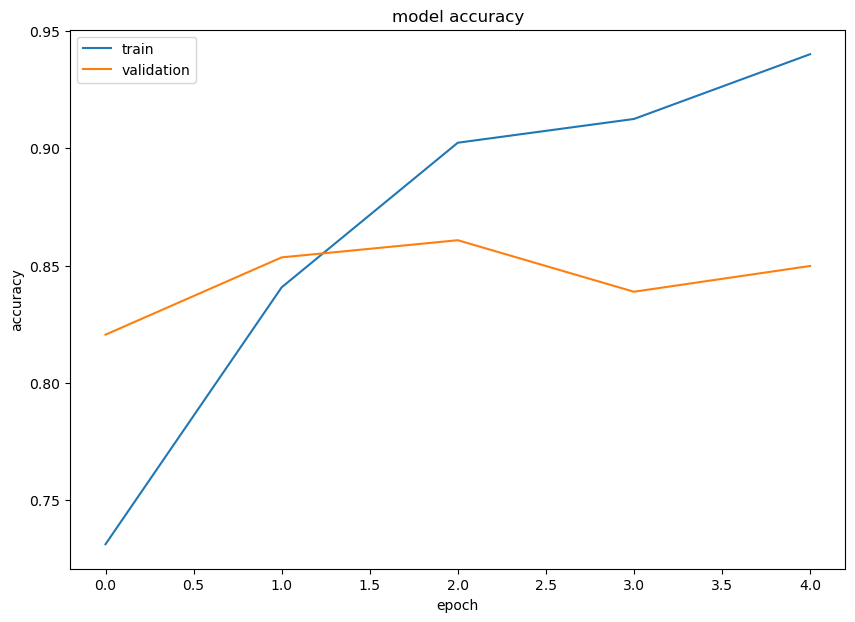

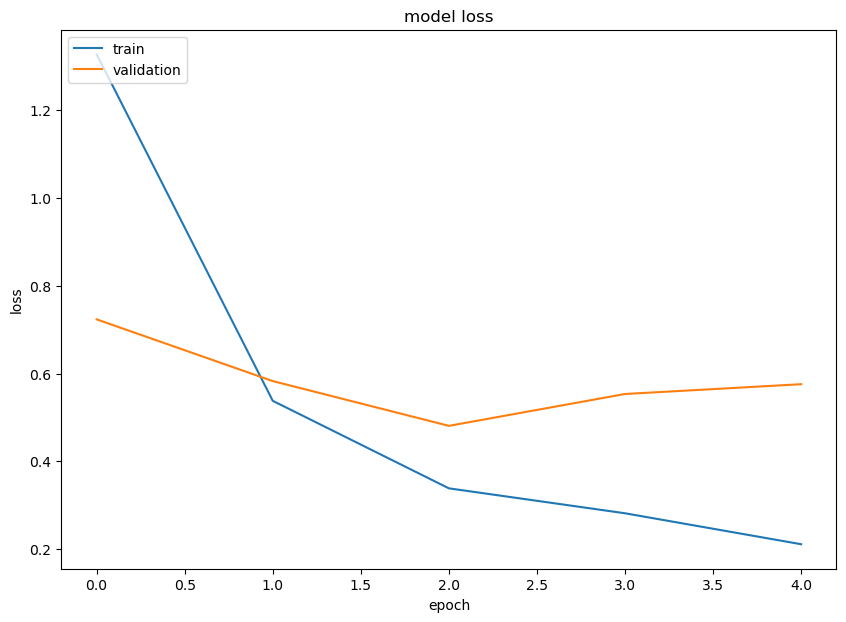

In [19]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()